# Карасов Николай Дмитриевич

## Домашняя работа №2

## Задание: Решение СЛАУ

Рассмотрим краевую задачу для ОДУ:
$$−u''(x)+u(x)=x,\ 0\leq x \leq 1,\ u(0)=u(1)=0.$$

Постройте его аналитическое решение, которое можно будет использовать для проверки правильности вычислений.

1) Найти решение СЛАУ с помощью встроенной функции.

2) Реализовать метод прогонки.

### Импорты

In [8]:
import numpy as np
import time
from matplotlib import pyplot as plt
from typing import Tuple, NoReturn

Получим $\href{https://www.wolframalpha.com/input/?i=-u%27%27%28x%29+%2B+u%28x%29+%3D+x%2C+u%280%29+%3D+0%2C+u%281%29+%3D+0}{решение}$ дифф. уравнения с помощью WolframAlpha. 

In [9]:
def honest_solution(x: float) -> float:
    return -(x * np.exp(2) - x + np.exp(1.0 - x) - np.exp(1.0 + x)) / (1.0 - np.exp(2))

### Решение СЛАУ встроенной функцией

In [10]:
def task_1(N: int) -> Tuple:
    _start = time.perf_counter()
    
    h = 1.0 / (N + 1)
    
    x_i = np.arange(N + 2) * h
    
    b = np.append(x_i[:N + 1], 0)

    d1 = np.full(N + 1, -1 / h ** 2)
    d1[0] = 0
    
    d = np.full(N + 2, 2 / h ** 2 + 1)
    d[0], d[-1] = 1, 1
    
    d2 = np.full(N + 1, -1 / h ** 2)
    d2[-1] = 0

    A = np.diag(d) + np.diag(d1, 1) + np.diag(d2, -1)
    u = np.linalg.solve(A, b)
    _end = time.perf_counter()
    
    return u, np.max(np.abs(u - honest_solution(x_i))), _end - _start

### Метод прогонки

In [11]:
def task_2(N: int) -> Tuple:
    _start = time.perf_counter()
    
    h = 1.0 / (N + 1)
    
    x_i = np.arange(N + 2) * h

    b = np.append(x_i[:N + 1], 0)
    
    d1 = np.full(N + 2, 1 / h ** 2)
    d1[0], d1[-1] = 0, 0
    
    d = np.full(N + 2, 2 / h ** 2 + 1)
    d[0], d[-1] = 1, 1
    
    d2 = np.full(N + 2, 1 / h ** 2)
    d2[-1], d2[0] = 0, 0
    
    alpha, beta = np.zeros(N + 2), np.zeros(N + 2)
    alpha[0], beta[0] = d1[0] / d[0], b[0] / d[0]
    
    for i in range(1, N + 2):
        alpha[i] = d1[i] / (d[i] - d2[i] * alpha[i - 1])
        beta[i] = (b[i] + d2[i] * beta[i - 1]) / (d[i] - d2[i] * alpha[i - 1])

    u = np.zeros(N + 2)
    u[N] = beta[N]
    
    for i in range(N, -1, -1):
        u[i] = alpha[i] * u[i + 1] + beta[i]
        
    _end = time.perf_counter()

    return u, np.max(np.abs(u - honest_solution(x_i))), _end - _start

## Сравним результаты

In [12]:
def compare_solutions(N: int) -> NoReturn:
    _, err_1, time_1 = task_1(N)
    _, err_2, time_2 = task_2(N)
    
    print('-' * 15, N, '-' * 15)

    print('Первое задание:')
    print('Максимум модуля отклонения:', err_1)
    print('Время (в секундах):', time_1)

    print('Метод прогонки:')
    print('Максимум модуля отклонения:', err_2)
    print('Время (в секундах):', time_2)

In [13]:
for N in [100, 500, 1000]:
    compare_solutions(N)

--------------- 100 ---------------
Первое задание:
Максимум модуля отклонения: 4.3345479892875627e-07
Время (в секундах): 0.002415705000004209
Метод прогонки:
Максимум модуля отклонения: 4.334548041051711e-07
Время (в секундах): 0.0005612109999901804
--------------- 500 ---------------
Первое задание:
Максимум модуля отклонения: 1.761746335621206e-08
Время (в секундах): 0.01422970300001225
Метод прогонки:
Максимум модуля отклонения: 1.761740349437435e-08
Время (в секундах): 0.003360223000015594
--------------- 1000 ---------------
Первое задание:
Максимум модуля отклонения: 4.412906970396868e-09
Время (в секундах): 0.03666382499997667
Метод прогонки:
Максимум модуля отклонения: 4.413158637139869e-09
Время (в секундах): 0.005723009000007551


На приведенных выше примерах видно, что максимум из модулей отклонения очень маленький. Можем считать, что оба метода работают правильно.

## Время работы

In [15]:
%%time
N = 2000
N_lst = np.arange(3, N, 10)

timer_1 = [task_1(i)[2] for i in range(3, N, 10)]
timer_2 = [task_2(i)[2] for i in range(3, N, 10)]

CPU times: user 33.1 s, sys: 6.26 s, total: 39.4 s
Wall time: 10.4 s


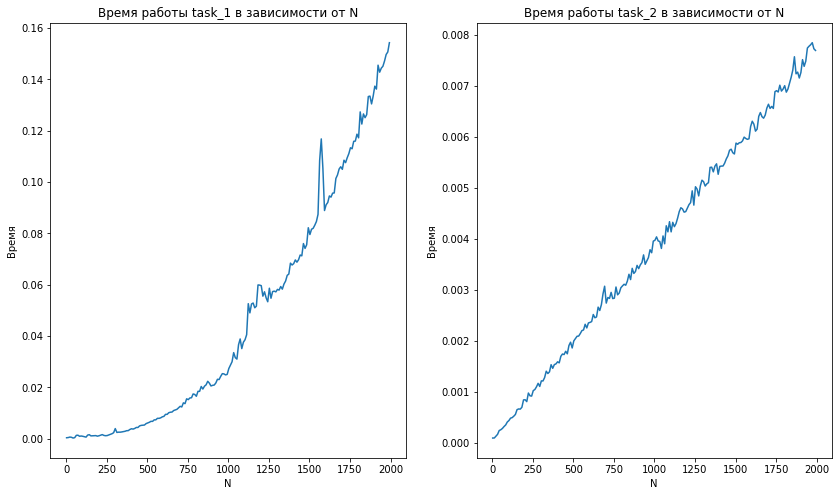

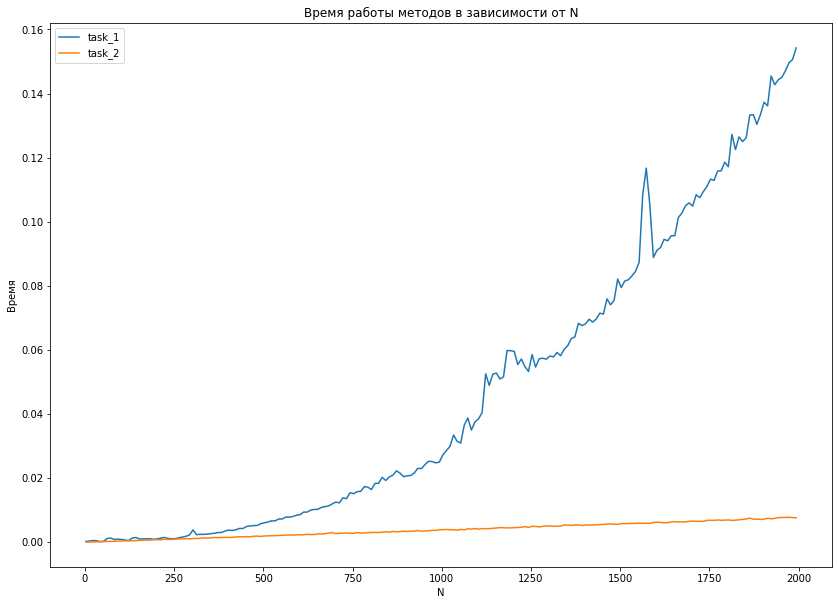

In [16]:
w, h = 14, 8
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(w, h))

ax1.plot(N_lst, timer_1)
ax1.set_title('Время работы task_1 в зависимости от N')
ax1.set_ylabel('Время')
ax1.set_xlabel('N')

ax2.plot(N_lst, timer_2)
ax2.set_title('Время работы task_2 в зависимости от N')
ax2.set_ylabel('Время')
ax2.set_xlabel('N')

plt.figure(figsize = (w, 10))
plt.plot(N_lst, timer_1, label = 'task_1')
plt.plot(N_lst, timer_2, label = 'task_2')
plt.title('Время работы методов в зависимости от N')
plt.xlabel('N')
plt.ylabel('Время')
plt.legend()
plt.show()

Как видно из графиков, метод прогонки работает намного быстрее, чем стандартный Гаусс, особенно это видно с ростом $N$. Что в принципе и ожидалось, так как Гаусс требует $O(N^3)$ операций, а метод прогонки $O(N)$.